# Dataset visualization

In [2]:
from src.yaae.engine import Node
from src.yaae.nn import NN, Optimizer
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

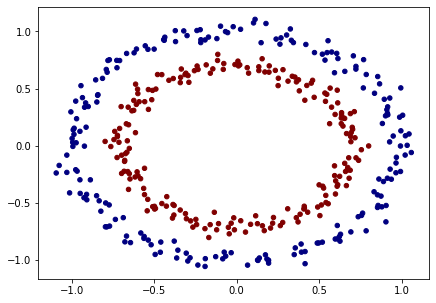

In [3]:
np.random.seed(0)
samples = 400
X, y = make_circles(n_samples=samples, noise=0.05, factor=0.7)
inputs = Node(X, requires_grad=False)
labels = Node(y[:, np.newaxis], requires_grad=False)

# visualize in 2D
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

# Model initialization

In [4]:
model = NN(nin=2, nouts=[16,16,1])
print(model)
optimizer = Optimizer(params=model.parameters(), lr=0.1)

model(
   (Linear0): Linear(row=2, column=16, isLastLayer=False)
   (Linear1): Linear(row=16, column=16, isLastLayer=False)
   (Linear2): Linear(row=16, column=1, isLastLayer=True)
)


In [5]:
def cross_entropy_loss(y_pred, labels):
    # 1. Compute binary cross entropy loss.
    loss = labels * (y_pred.log()) + (1. - labels) * ((1. - y_pred).log())
    train_loss = loss.sum(keepdims=False) / -samples

    # 2. Compute training accuracy.
    y_pred_class = np.where(y_pred.data<0.5, 0, 1)
    train_acc = np.sum(labels.data == y_pred_class.data) / samples

    return train_loss, train_acc

# Model training

In [6]:
EPOCHS = 500

for epoch in range(EPOCHS+1):
    # Empty weights/biases gradient.
    optimizer.zero_grad()
    # Forward pass.
    y_pred = model(inputs)
    train_loss, train_acc = cross_entropy_loss(y_pred, labels)
    # Backward pass.
    train_loss.backward()
    # Parameters update.
    optimizer.step()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: train-loss: {train_loss.data} | train-acc: {train_acc}")

Epoch 0: train-loss: 0.8613315021635857 | train-acc: 0.5025
Epoch 20: train-loss: 0.6892754824810354 | train-acc: 0.5
Epoch 40: train-loss: 0.6478749776302373 | train-acc: 0.615
Epoch 60: train-loss: 0.6135810785498925 | train-acc: 0.7125
Epoch 80: train-loss: 0.5826370546602156 | train-acc: 0.78
Epoch 100: train-loss: 0.551543616197664 | train-acc: 0.8925
Epoch 120: train-loss: 0.5187237827463936 | train-acc: 0.9625
Epoch 140: train-loss: 0.48718323448911444 | train-acc: 0.9675
Epoch 160: train-loss: 0.4493681804663065 | train-acc: 0.9875
Epoch 180: train-loss: 0.4162350395815234 | train-acc: 0.99
Epoch 200: train-loss: 0.38564199160662027 | train-acc: 0.995
Epoch 220: train-loss: 0.35653110831804874 | train-acc: 0.9975
Epoch 240: train-loss: 0.3294661659480237 | train-acc: 0.9975
Epoch 260: train-loss: 0.30489315659607047 | train-acc: 1.0
Epoch 280: train-loss: 0.2803951006706742 | train-acc: 1.0
Epoch 300: train-loss: 0.26026918430609564 | train-acc: 1.0
Epoch 320: train-loss: 0.436

# Result visualization

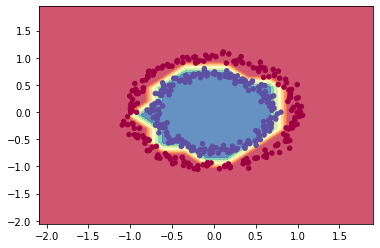

In [7]:
# Set min and max values and give it some padding.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.25

# Generate a grid of points with distance h between them.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the function value for the whole grid.
Xmesh = np.c_[xx.ravel(), yy.ravel()]
Z = model(Node(Xmesh, requires_grad=False))
pred_class = np.where(Z.data<0.5, 0, 1)
pred_class = pred_class.reshape(xx.shape)

# Plot the contour and training examples.
plt.contourf(xx, yy, pred_class, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()